In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

In [26]:
#Optional for disabling warnings 
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [27]:
#Set figure resolution to 300dpi
import matplotlib as mpl
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

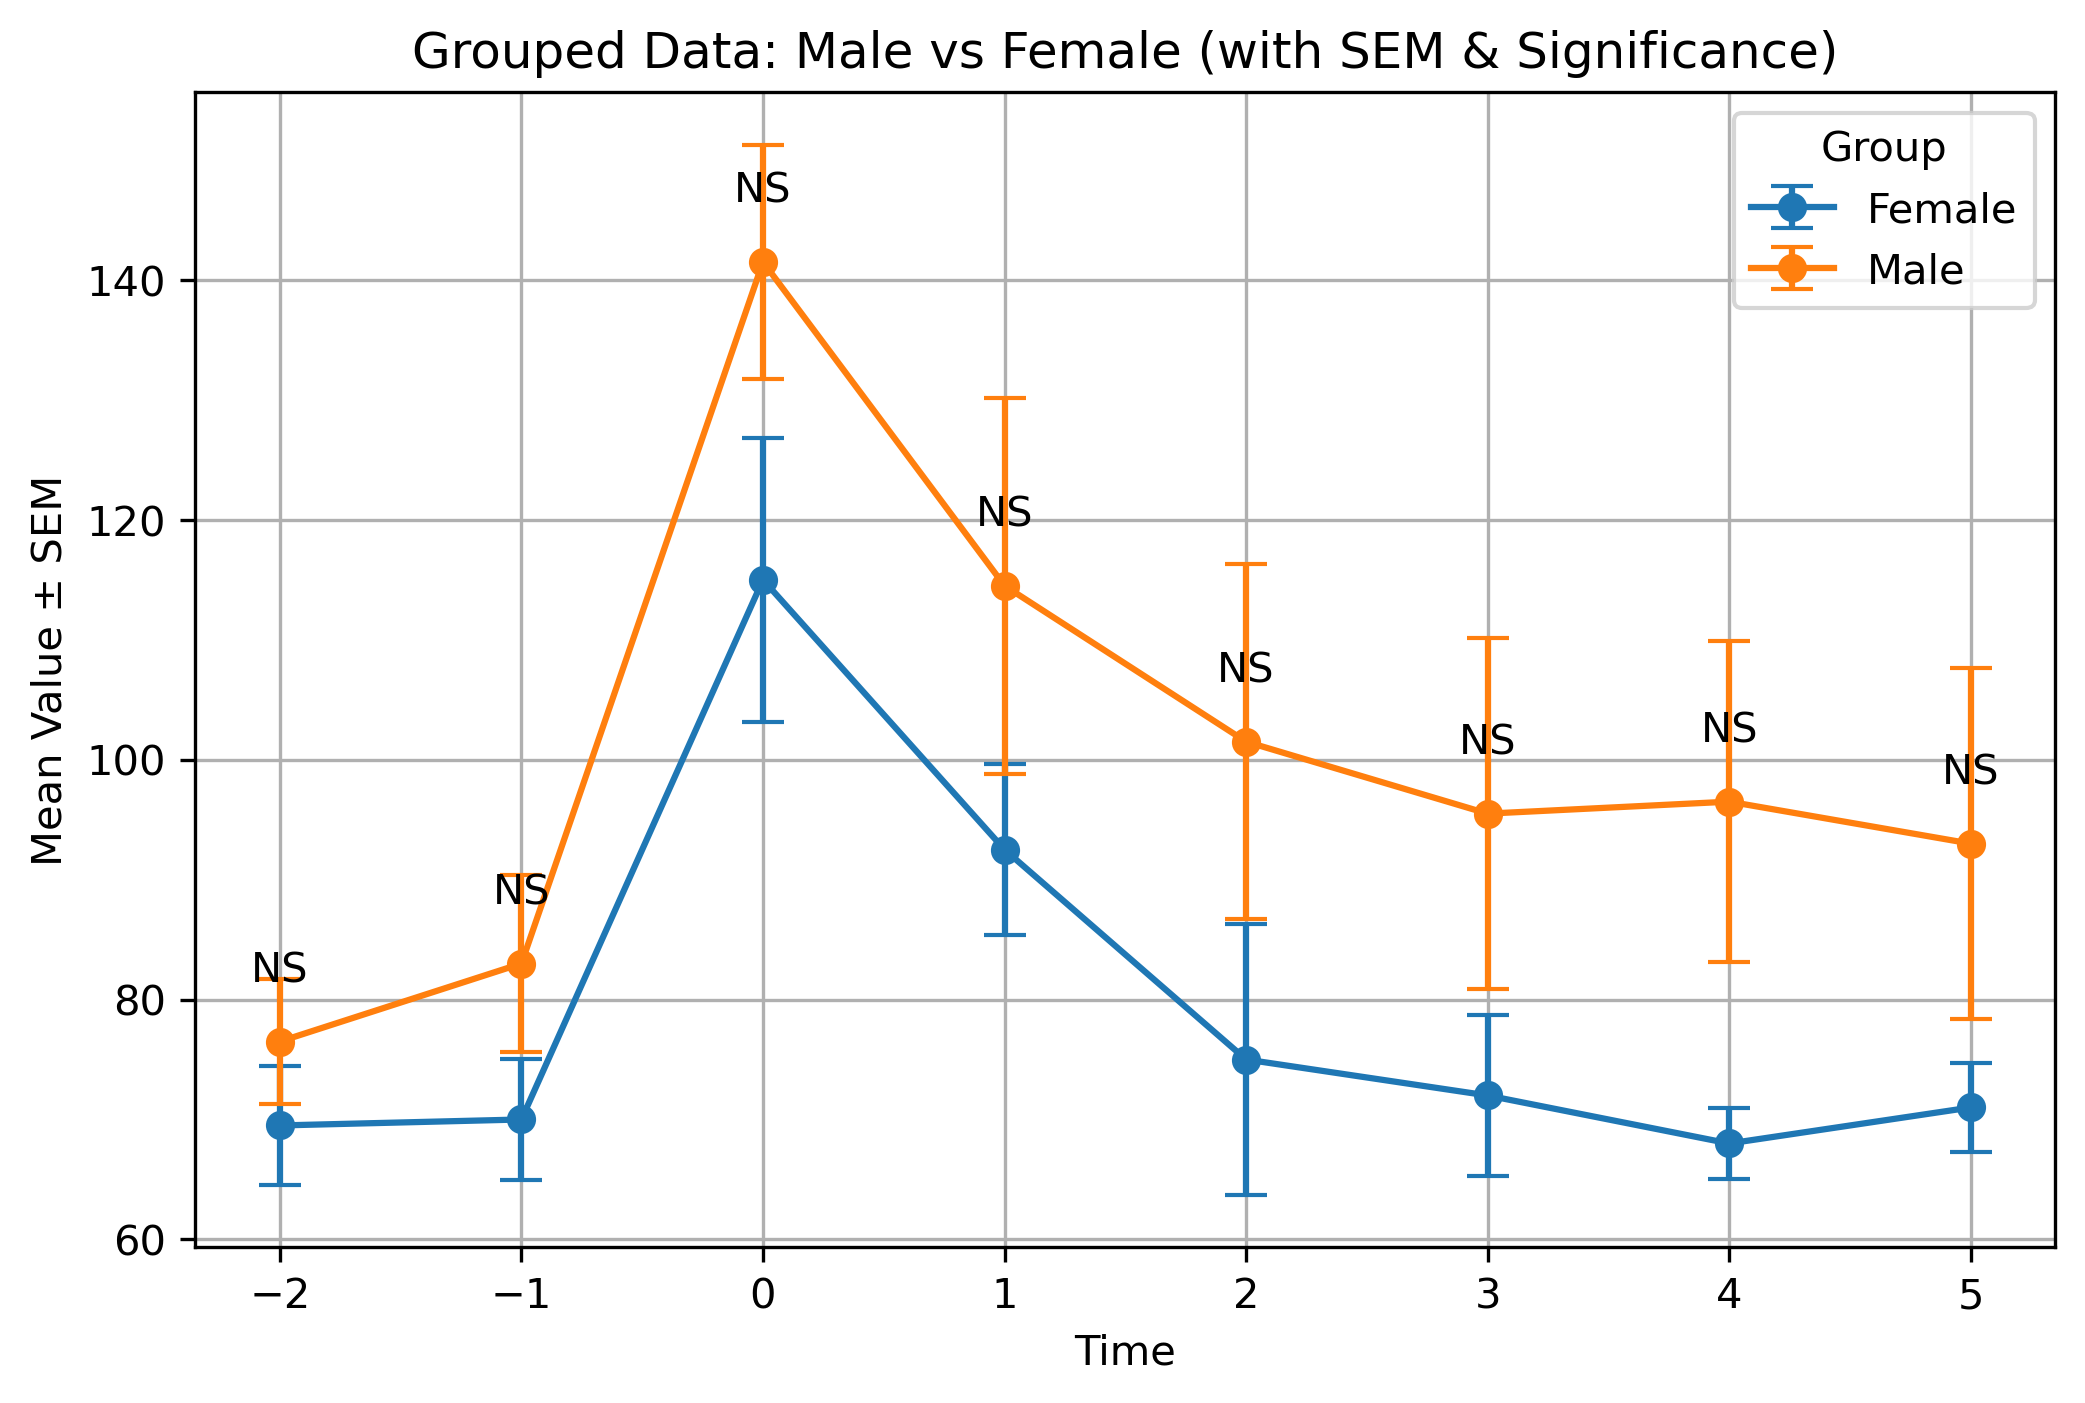

,Time,p-value,Significance
0,-2,0.368512,NS
1,-1,0.201845,NS
2,0,0.137009,NS
3,1,0.268037,NS
4,2,0.207850,NS
5,3,0.215226,NS
6,4,0.120849,NS
7,5,0.231818,NS


In [28]:

# Load the dataset
df = pd.read_excel(r'./Bio212L_Lab1.xlsx', index_col=0)

# Transpose to have individuals as columns
dft = df.transpose()

# Rename "Sit" and "Stand" to numeric labels
dft.rename(index={'Sit': '-2', 'Stand': '-1'}, inplace=True)

# Convert index to integers for consistency
dft.index = dft.index.astype(int)

# Define the group mappings
group_mapping = {
    1: 'Male', 2: 'Male', 3: 'Male', 4: 'Male',
    5: 'Female', 6: 'Female', 7: 'Female', 8: 'Female'
}

# Transpose to assign groups to individuals
dft_t = dft.transpose()

# Add a 'Group' column
dft_t['Group'] = [group_mapping[int(col)] for col in dft_t.index]

# Compute mean and standard error of the mean (SEM)
group_means = dft_t.groupby('Group').mean().transpose()
group_stds = dft_t.groupby('Group').std().transpose()

# Number of samples in each group (4 males, 4 females)
N_male = sum(dft_t['Group'] == 'Male')
N_female = sum(dft_t['Group'] == 'Female')

# Compute SEM
group_sems = group_stds.copy()
group_sems['Male'] /= np.sqrt(N_male)
group_sems['Female'] /= np.sqrt(N_female)

# Perform t-tests at each time point
time_points = group_means.index
p_values = []
for t in time_points:
    male_values = dft_t[dft_t['Group'] == 'Male'][t]
    female_values = dft_t[dft_t['Group'] == 'Female'][t]
    t_stat, p = ttest_ind(male_values, female_values, equal_var=False)
    p_values.append(p)

# Determine significance labels
significance_labels = []
for p in p_values:
    if p < 0.001:
        significance_labels.append("***")  # Highly significant
    elif p < 0.01:
        significance_labels.append("**")   # Significant
    elif p < 0.05:
        significance_labels.append("*")    # Marginal significance
    else:
        significance_labels.append("NS")   # Not significant

# Plot the data with SEM error bars
plt.figure(figsize=(8, 5))

for group in group_means.columns:
    plt.errorbar(time_points, group_means[group], yerr=group_sems[group], 
                 capsize=5, marker='o', label=group, linestyle='-')

# Annotate significance labels at each time point
for i, (x, p_label) in enumerate(zip(time_points, significance_labels)):
    plt.text(x, max(group_means.loc[x]) + 5, p_label, ha='center', fontsize=10, color='black')

# Formatting the plot
plt.xlabel("Time")
plt.ylabel("Mean Value ± SEM")
plt.title("Grouped Data: Male vs Female (with SEM & Significance)")
plt.legend(title="Group")
plt.grid(True)

# Show the plot
plt.show()

# Display p-values for reference
p_value_table = pd.DataFrame({'Time': time_points, 'p-value': p_values, 'Significance': significance_labels})
from IPython.display import display
display(p_value_table)

## Please note: NS = Not significant